In [529]:
import pandas as pd
import numpy as np

In [530]:
X1=np.random.randint(1,20,100)
X2=np.random.randint(60,80,100)
X3=np.random.randint(25,40,100)
X4=np.random.randint(1,100,100)
X=np.concatenate((X1,X2,X3,X4))
X

array([15,  4, 12, 13,  2, 19, 19,  4,  4, 11,  5, 11, 10,  8,  6,  6,  8,
       15, 14, 11, 12, 13,  8, 18,  1, 15,  8, 11, 12, 12,  4, 16,  4,  5,
        5,  8, 10, 17,  9, 19, 14,  8,  9, 11,  1, 14,  5, 14,  4,  1, 19,
        8, 15, 15,  9,  9, 10,  9,  3, 11,  6,  2,  7, 18,  2, 17, 11, 12,
       19,  7,  6,  1, 17, 11, 18, 17,  7, 17,  9, 17,  8, 17,  7,  1, 13,
       19, 19, 17, 13, 16,  8, 19, 18,  1, 14, 19, 15, 18,  2, 17, 77, 65,
       78, 63, 60, 67, 66, 62, 69, 69, 78, 73, 61, 60, 77, 66, 67, 60, 62,
       67, 74, 64, 62, 78, 60, 74, 67, 61, 62, 73, 73, 70, 75, 63, 79, 64,
       73, 75, 77, 66, 69, 66, 60, 78, 75, 78, 63, 77, 61, 60, 74, 64, 79,
       70, 69, 61, 62, 71, 79, 64, 64, 65, 68, 61, 71, 62, 79, 71, 76, 69,
       73, 76, 77, 78, 76, 73, 68, 67, 61, 72, 66, 68, 70, 73, 63, 72, 61,
       64, 70, 65, 77, 69, 63, 68, 65, 61, 76, 64, 65, 71, 31, 29, 34, 30,
       29, 35, 33, 39, 30, 35, 32, 26, 36, 37, 33, 29, 31, 34, 37, 25, 34,
       29, 36, 38, 34, 38

In [531]:
y1=np.random.randint(1,20,100)
y2=np.random.randint(60,80,100)
y3=np.random.randint(25,40,100)
y4=np.random.randint(1,100,100)
y=np.concatenate((y1,y2,y3,y4))

In [532]:
df=pd.DataFrame({"X":X,
               'y':y})


In [533]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [535]:
z_threshold = 2.5
z_scores = np.abs(df_scaled)
outliers = (z_scores > z_threshold).any(axis=1)
df_cleaned = df[~outliers]
df_cleaned

,X,y
0,15,12
1,4,16
2,12,12
3,13,15
4,2,10
...,...,...
395,39,28
396,46,74
397,29,35
398,62,61


In [536]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_cleaned)


/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [538]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_cleaned, clusters)
silhouette_avg

0.5916520049956577

,X,y
0,-0.824028,-1.154958
3,-0.898830,-0.928662
6,-0.824028,-1.079526
12,-0.861429,-1.494402
13,-0.824028,-1.117242
...,...,...
392,-0.973631,-0.061194
394,-0.375221,-0.023478
397,-0.001216,-0.626934
398,-0.487423,-0.740082


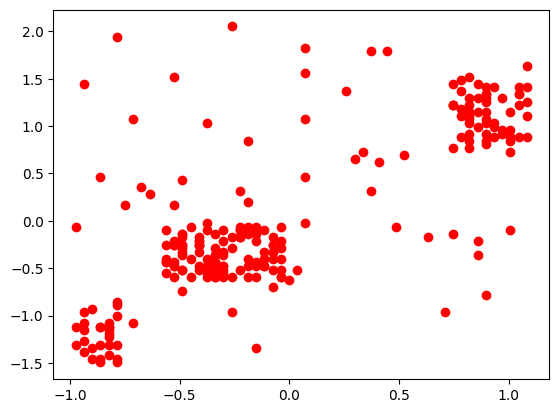

In [507]:
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(df_scaled['X'],df_scaled['y'],color='red')

In [508]:
from sklearn.cluster import KMeans

In [515]:
k_mean=KMeans(n_clusters=2,random_state=42)

k_mean.fit(df_scaled[['X','y']])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [516]:
df_scaled['label']=k_mean.labels_

/tmp/ipykernel_7239/4196701573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled['label']=k_mean.labels_


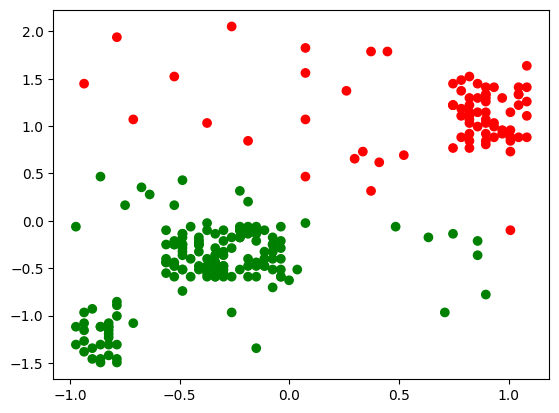

In [517]:
col=['green','blue','orange','red']
plt.scatter(df_scaled['X'],df_scaled['y'],c=df_scaled['label'],cmap=matplotlib.colors.ListedColormap(col))

/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

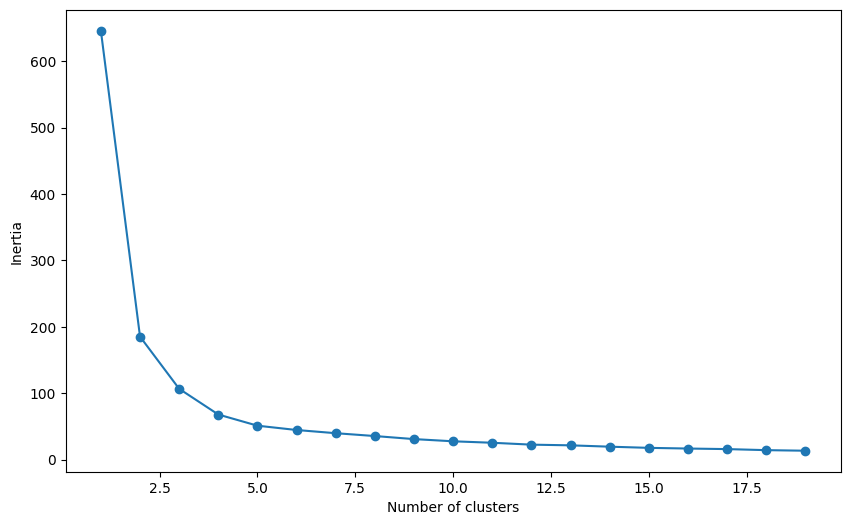

In [518]:
sse=[]
for clust in range(1,20):
    k_mean=KMeans(n_clusters=clust,init='k-means++')
    k_mean.fit(df[['X','y']])
    sse.append(k_mean.inertia_)
newfram=pd.DataFrame({
    'clus':range(1,20),
    'inertia':sse
})
plt.figure(figsize=(10,6))
plt.plot(newfram['clus'],newfram['inertia'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [519]:
newkmeans=KMeans(n_clusters=3,init='k-means++')
newkmeans.fit(df_scaled[['X','y']])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [520]:
col=['green', 'blue', 'orange','red','black']

In [522]:
df_scaled['new_labels']=newkmeans.labels_
df_scaled['new_labels'].unique()

/tmp/ipykernel_7239/4180459500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled['new_labels']=newkmeans.labels_


array([0, 1, 2], dtype=int32)

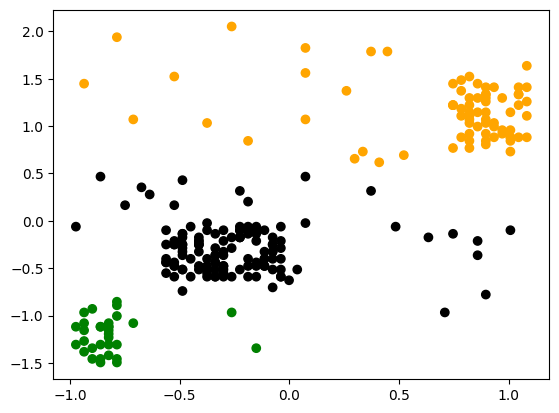

In [524]:
plt.scatter(df_scaled['X'],df_scaled['y'],c=df_scaled['new_labels'],cmap=matplotlib.colors.ListedColormap(col))

In [525]:
from sklearn.cluster import DBSCAN
db=DBSCAN()

In [526]:
db.fit(df[['X','y']])

DBSCAN()

In [366]:
df['dblabel']=db.labels_

In [367]:
col=['green','blue','orange','red']


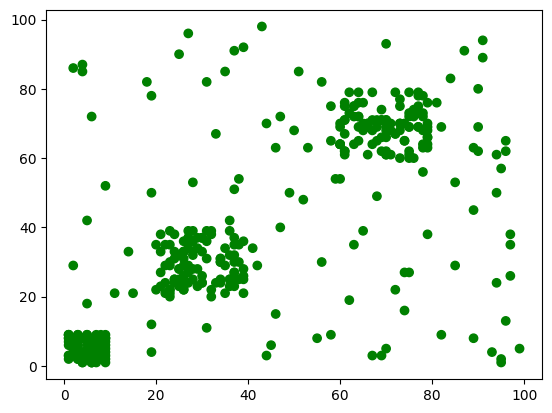

In [368]:
plt.scatter(df['X'],df['y'],c=df['dblabel'],cmap=matplotlib.colors.ListedColormap(col))

In [369]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(df[['X','y']])

In [286]:
dist,indi=nbrs.kneighbors(df[['X','y']])


In [287]:
dist=np.sort(dist,axis=0)

In [288]:
dist=dist[:,1]

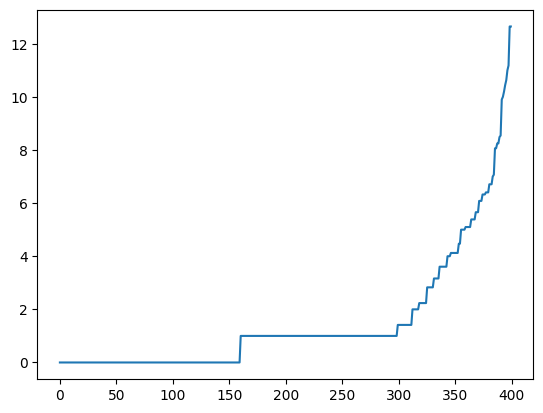

In [289]:
plt.plot(dist)

In [297]:
col=['green','blue','orange','red']


In [311]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=9)
db.fit(df[['X','y']])

DBSCAN(eps=9)

In [309]:
df['dblabel']=db.labels_

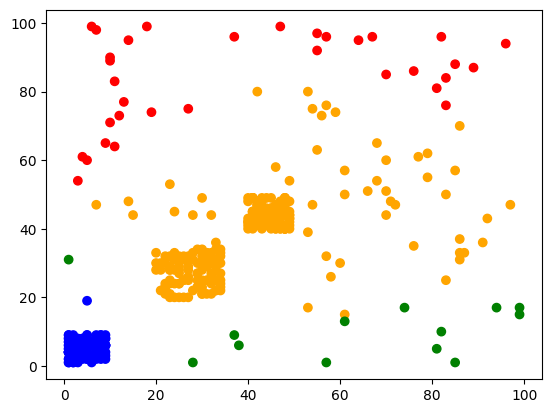

In [310]:
plt.scatter(df['X'],df['y'],c=df['dblabel'],cmap=matplotlib.colors.ListedColormap(col))

In [527]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Generate synthetic clustered data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(10, 2, (100, 2)),
    np.random.normal(30, 5, (100, 2)),
    np.random.normal(60, 8, (100, 2))
])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df['Cluster']

/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0      2
1      2
2      2
3      2
4      2
      ..
295    1
296    1
297    1
298    1
299    1
Name: Cluster, Length: 300, dtype: int32

In [528]:
df['Cluster'].unique()

array([2, 0, 1], dtype=int32)